In [50]:
import pandas as pd
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [51]:
df = pd.read_csv("D://MBA//BigBasket//book1.csv", header = None)

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Boiled Rice,Health Drinks,Mosquito Repellent,Other Rice Products,Raw Rice,Root Vegetables,Sugar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avalakki / Poha,Orange,Ridge Gourd,Cucumber,Cucumber,Gourd,Root Vegetables,Sunflower Oils,Toor Dal,Whole Spices,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Almonds,Banana,lemon,Cashews,Chips,Raw Rice,Snacky Nuts,Sooji & Rava,Toor Dal,Yogurt & Lassi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic F&V,Cookies,Facial Tissues,Organic F&V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Namkeen,Toor Dal,Cucumber,Sunflower Oils,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
8374,Bread,Root Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8375,Avalakki / Poha,Bhindi,Brinjals,Cucumber,Gourd,Root Vegetables,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8376,Avalakki / Poha,Bread,Instant Noodles,Other Dry Fruits,Other Flours,Root Vegetables,Sunflower Oils,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8377,Cooking Oil,Jams & Sauces,Organic Masalas & Spices,Toor Dal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8378,Apple,Toor Dal,Organic F&V,Organic Masalas & Spices,Other Dry Fruits,Other Oils,Cucumber,Gourd,Whole Grains,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1236,Apple,Bhindi,Cookies,Eggs,Jaggery,Namkeen,Raisins,Root Vegetables,Snacky Nuts,Sugar Cubes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,Bhindi,Cucumber,Health Drinks,Organic Flours,Organic Masalas & Spices,Toor Dal,Raw Rice,Sooji & Rava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,Avalakki / Poha,Brinjals,Gourd,Raw Peanuts,Root Vegetables,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,Body Wash,Face Wash,Hand Wash,Namkeen,Toor Dal,Toor Dal,Raw Peanuts,Raw Rice,Regular Pasta,Snacky Nuts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,Bread,Mosquito Repellent,Organic F&V,Other Rice Products,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5043,Buns & Pavs,Chinese Noodles,Corn Snacks,Maida,Mango Juices,Organic Masalas & Spices,Toor Dal,Other Juices,Root Vegetables,Toor Dal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8289,Banana,Cucumber,Health Supplements,Organic F&V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Namkeen,Toor Dal,Cucumber,Sunflower Oils,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,Bhindi,Curd,Cucumber,Mosquito Repellent,Organic F&V,Organic Masalas & Spices,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3654,Bread,Cakes,Namkeen,Organic F&V,Gourd,Sooji & Rava,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,8379,7735,7081,6172,5124,4099,3148,2341,1688,1201,...,60,40,32,17,11,7,5,2,1,1
unique,156,172,160,147,139,131,113,93,83,74,...,13,13,9,9,6,5,4,2,1,1
top,Beans,Brinjals,Cucumber,Toor Dal,Toor Dal,Toor Dal,Toor Dal,Root Vegetables,Root Vegetables,Toor Dal,...,Whole Spices,Urad Dal,Whole Spices,Urad Dal,Whole Spices,Whole Spices,Urad Dal,Toor Dal,Urad Dal,Whole Spices
freq,971,880,784,619,643,534,443,322,228,155,...,14,12,12,5,4,3,2,1,1,1


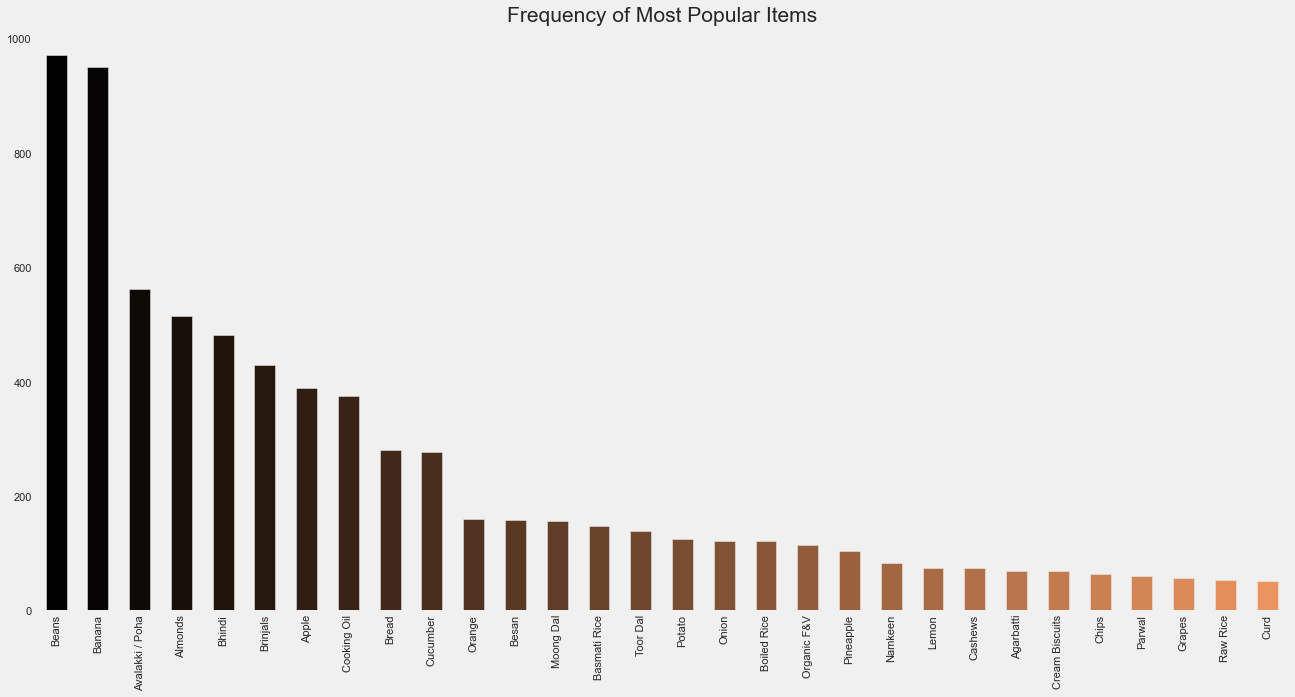

In [56]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(30).plot.bar(color = color)
plt.title('Frequency of Most Popular Items', fontsize = 21)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

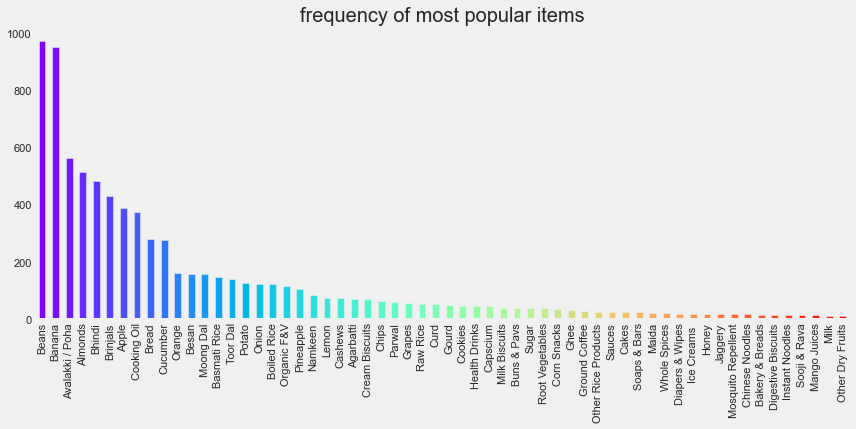

In [57]:
color = plt.cm.rainbow(np.linspace(0, 1, 60))
df[0].value_counts().head(60).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [58]:
y = df[0].value_counts().head(35).to_frame()
y.index

Index(['Beans', 'Banana', 'Avalakki / Poha', 'Almonds', 'Bhindi', 'Brinjals',
       'Apple', 'Cooking Oil', 'Bread', 'Cucumber', 'Orange', 'Besan',
       'Moong Dal', 'Basmati Rice', 'Toor Dal', 'Potato', 'Onion',
       'Boiled Rice', 'Organic F&V', 'Pineapple', 'Namkeen', 'Lemon',
       'Cashews', 'Agarbatti', 'Cream Biscuits', 'Chips', 'Parwal', 'Grapes',
       'Raw Rice', 'Curd', 'Gourd', 'Cookies', 'Health Drinks', 'Capscium',
       ' Milk Biscuits'],
      dtype='object')

In [59]:
popular_items = df[0].value_counts().head(35).to_frame()
popular_items.index

Index(['Beans', 'Banana', 'Avalakki / Poha', 'Almonds', 'Bhindi', 'Brinjals',
       'Apple', 'Cooking Oil', 'Bread', 'Cucumber', 'Orange', 'Besan',
       'Moong Dal', 'Basmati Rice', 'Toor Dal', 'Potato', 'Onion',
       'Boiled Rice', 'Organic F&V', 'Pineapple', 'Namkeen', 'Lemon',
       'Cashews', 'Agarbatti', 'Cream Biscuits', 'Chips', 'Parwal', 'Grapes',
       'Raw Rice', 'Curd', 'Gourd', 'Cookies', 'Health Drinks', 'Capscium',
       ' Milk Biscuits'],
      dtype='object')

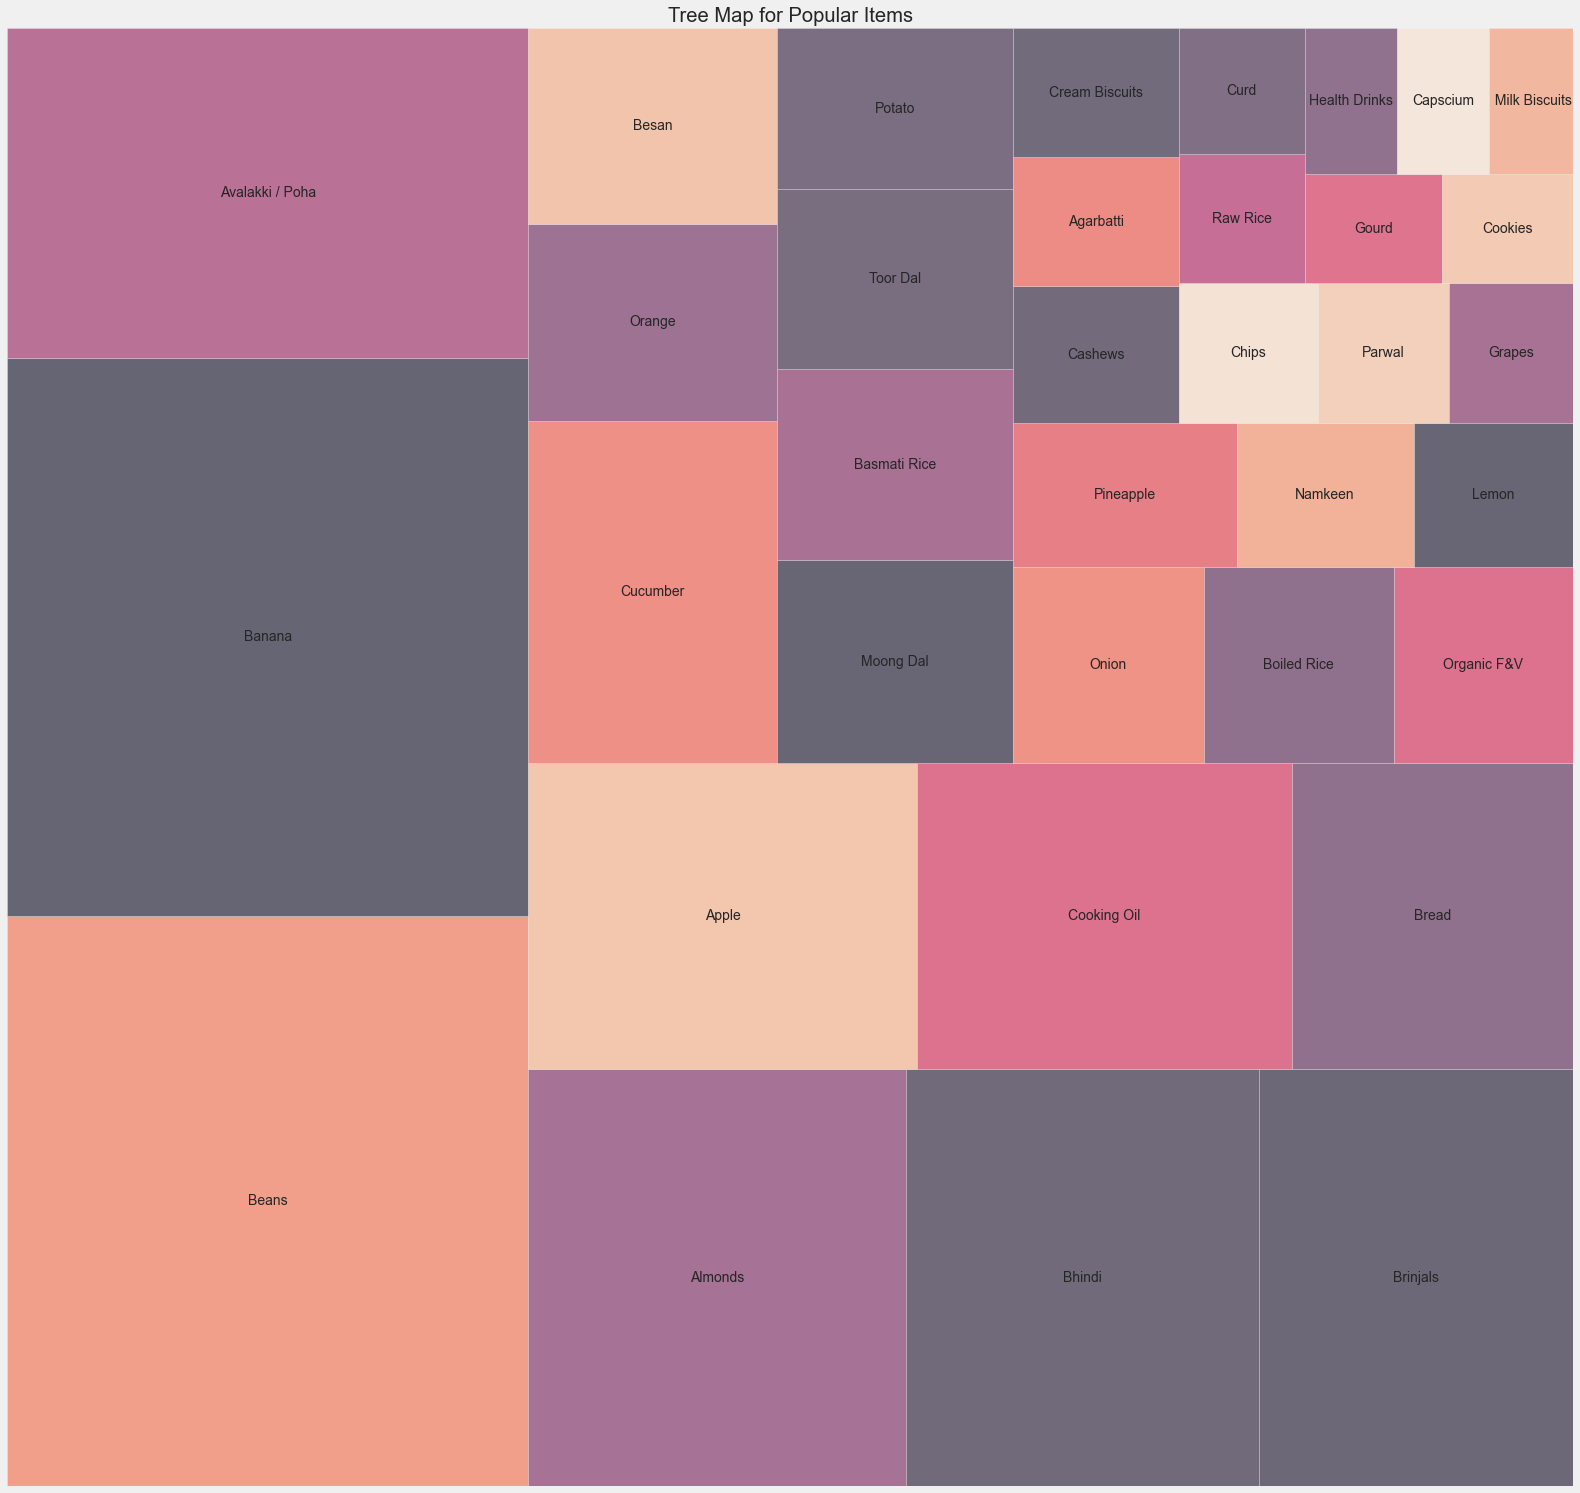

In [60]:
plt.rcParams['figure.figsize'] = (25, 25)
color = plt.cm.cool(np.linspace(0, 1, 3))
squarify.plot(sizes = popular_items.values, label = popular_items.index, alpha=.6)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()





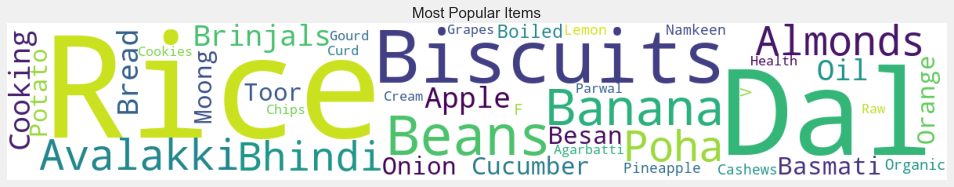

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 200, max_words = 40).generate(str(popular_items[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

In [62]:
df['food'] = 'Grocery Items'
food = df.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

findfont: Font family ['oragne'] not found. Falling back to DejaVu Sans.


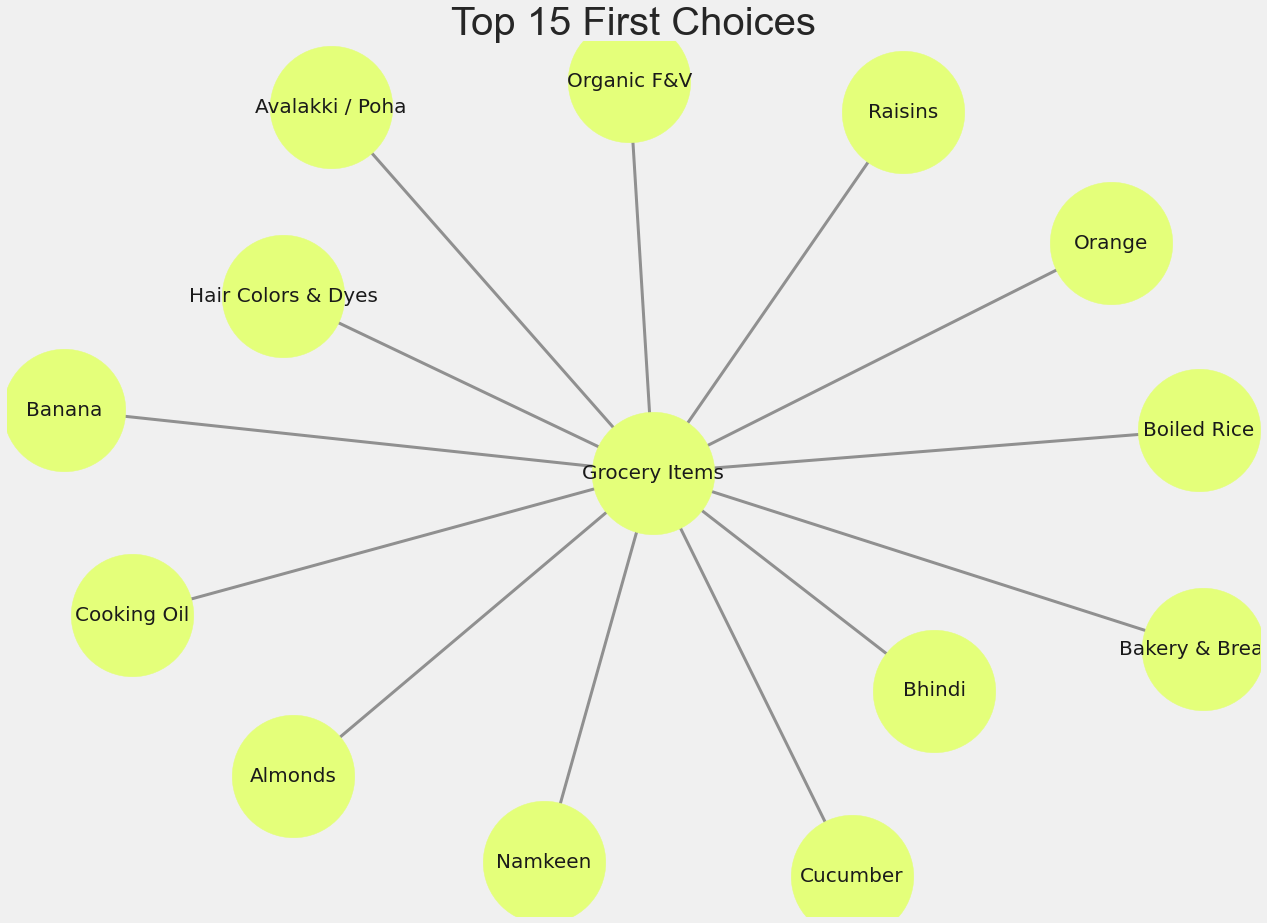

In [63]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 15)
pos = nx.spring_layout(food)

color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.4, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'oragne')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [64]:
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

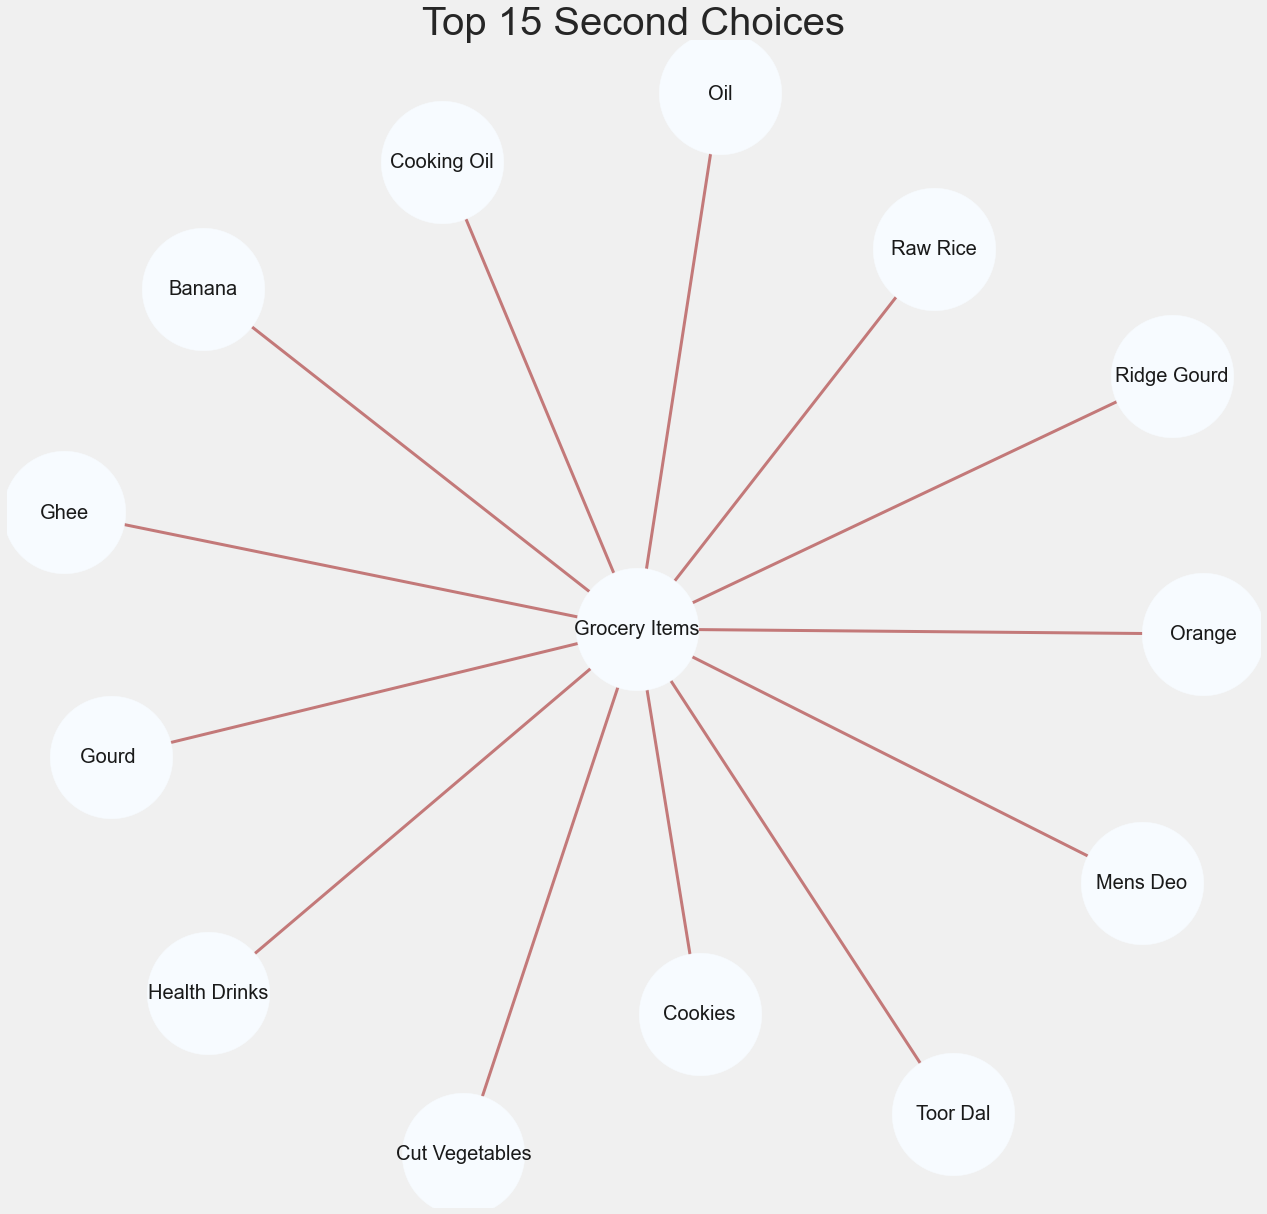

In [65]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [66]:
df['thirdchoice'] = 'Third Choice'
secondchoice = df.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

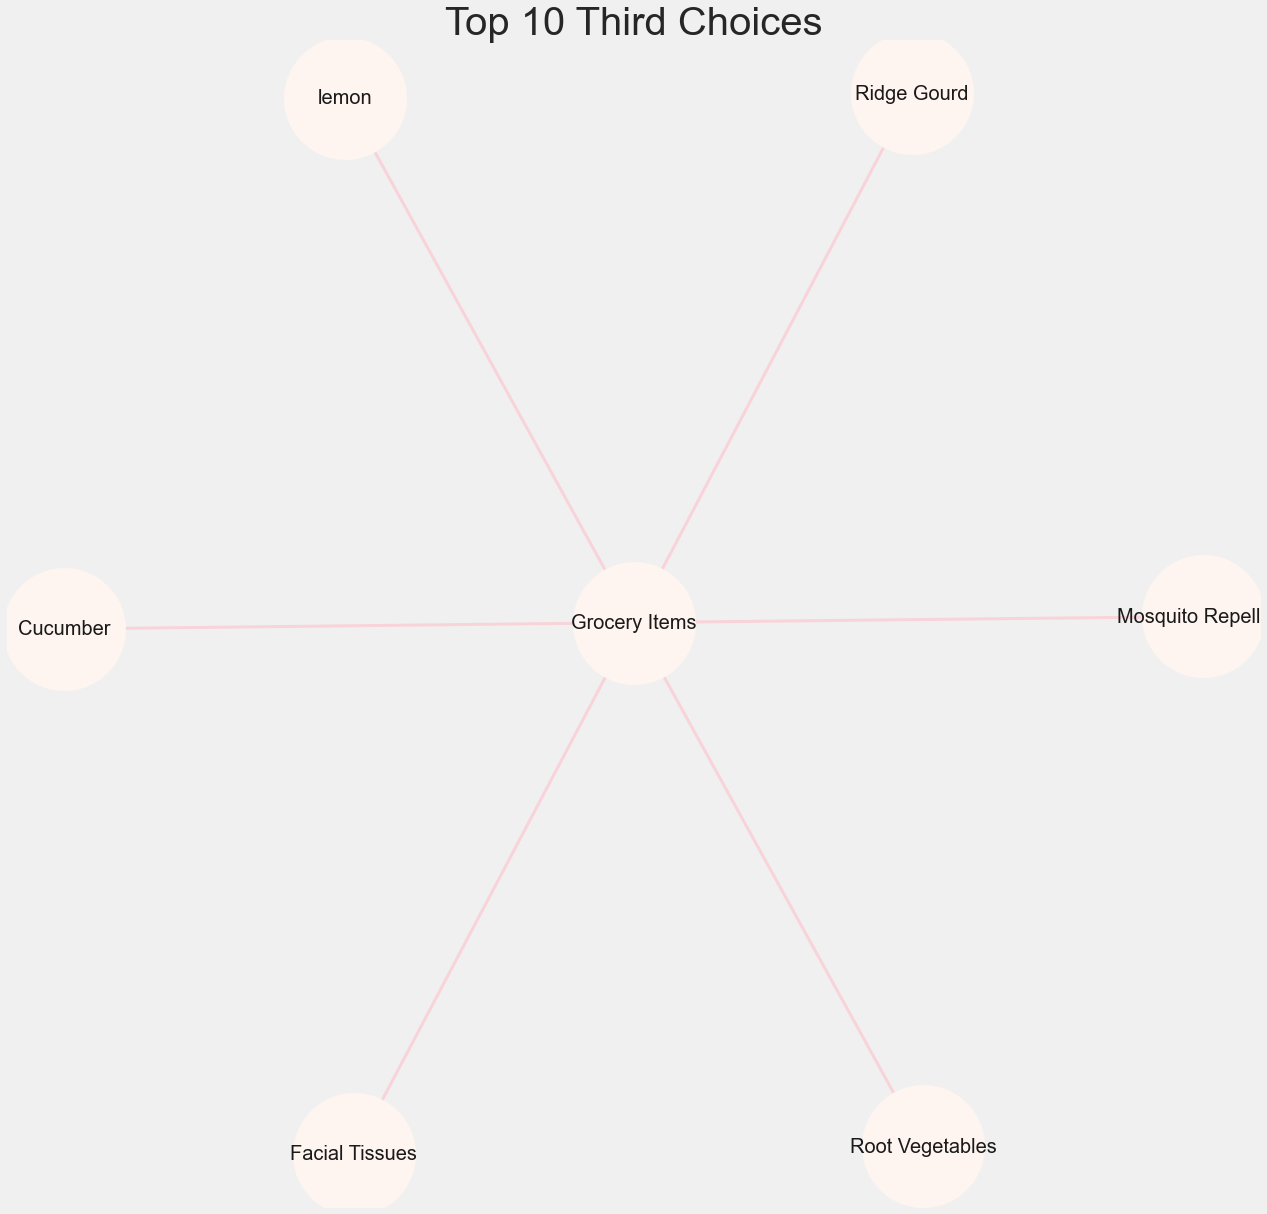

In [67]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()



In [68]:
df.shape

(8379, 31)

In [69]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 8379):
    trans.append([str(df.values[i,j]) for j in range(0, 31)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(8379, 31)


In [70]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
df = te.fit_transform(trans)
df = pd.DataFrame(df, columns = te.columns_)

# getting the shape of the data
df.shape

(8379, 227)

In [71]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = df.loc[:, ['Beans', 'Banana', 'Avalakki / Poha', 'Almonds', 'Bhindi', 'Brinjals',
       'Apple', 'Cooking Oil', 'Bread', 'Cucumber', 'Orange', 'Besan',
       'Moong Dal', 'Basmati Rice', 'Toor Dal', 'Potato', 'Onion',
       'Boiled Rice', 'Organic F&V', 'Pineapple', 'Namkeen', 'Lemon',
       'Cashews', 'Agarbatti', 'Cream Biscuits', 'Chips', 'Parwal', 'Grapes',
       'Raw Rice', 'Curd', 'Gourd', 'Cookies', 'Health Drinks', 'Capscium',
       ' Milk Biscuits']]

# checking the shape
data.shape



(8379, 35)

In [72]:
data.columns

Index(['Beans', 'Banana', 'Avalakki / Poha', 'Almonds', 'Bhindi', 'Brinjals',
       'Apple', 'Cooking Oil', 'Bread', 'Cucumber', 'Orange', 'Besan',
       'Moong Dal', 'Basmati Rice', 'Toor Dal', 'Potato', 'Onion',
       'Boiled Rice', 'Organic F&V', 'Pineapple', 'Namkeen', 'Lemon',
       'Cashews', 'Agarbatti', 'Cream Biscuits', 'Chips', 'Parwal', 'Grapes',
       'Raw Rice', 'Curd', 'Gourd', 'Cookies', 'Health Drinks', 'Capscium',
       ' Milk Biscuits'],
      dtype='object')

In [73]:
# getting the head of the data

data.head()

,Beans,Banana,Avalakki / Poha,Almonds,Bhindi,Brinjals,Apple,Cooking Oil,Bread,Cucumber,...,Chips,Parwal,Grapes,Raw Rice,Curd,Gourd,Cookies,Health Drinks,Capscium,Milk Biscuits
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,False,True,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Step 1: Create a frequency table of all the items that occur in all the transactions.

Step 2: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

Step 3: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

Step 4: We will now count the occurrences of each pair in all the transactions.

Step 5: Again only those itemsets are significant which cross the support threshold

Step 6: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

In [74]:
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)

In [105]:
frequent_itemsets = apriori(data, min_support=0.015, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.116959,(Beans)
1,0.134861,(Banana)
2,0.077098,(Avalakki / Poha)
3,0.062060,(Almonds)
4,0.088435,(Bhindi)
...,...,...
234,0.015396,"(Orange, Gourd, Brinjals, Cucumber)"
235,0.017902,"(Moong Dal, Brinjals, Toor Dal, Cucumber)"
236,0.033178,"(Gourd, Brinjals, Toor Dal, Cucumber)"
237,0.015157,"(Moong Dal, Gourd, Brinjals, Toor Dal)"


In [106]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [107]:
rules.shape

(92, 9)

In [108]:
rules.sort_values('lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
76,"(Beans, Brinjals, Cucumber)",(Gourd),0.029598,0.337749,0.023153,0.782258,2.316092,0.013156,3.041448
75,"(Beans, Gourd, Cucumber)",(Brinjals),0.040458,0.259697,0.023153,0.572271,2.203613,0.012646,1.730778
18,"(Beans, Brinjals)",(Gourd),0.047261,0.337749,0.034968,0.739899,2.190676,0.019006,2.546130
78,"(Cooking Oil, Gourd, Cucumber)",(Brinjals),0.030911,0.259697,0.017186,0.555985,2.140898,0.009158,1.667291
20,"(Beans, Cucumber)",(Gourd),0.055973,0.337749,0.040458,0.722814,2.140093,0.021553,2.389197
83,"(Orange, Brinjals, Cucumber)",(Gourd),0.021840,0.337749,0.015396,0.704918,2.087105,0.008019,2.244295
87,"(Gourd, Toor Dal, Cucumber)",(Brinjals),0.062060,0.259697,0.033178,0.534615,2.058613,0.017061,1.590734
17,"(Beans, Cucumber)",(Brinjals),0.055973,0.259697,0.029598,0.528785,2.036161,0.015062,1.571051
70,"(Moong Dal, Raw Rice)",(Toor Dal),0.031269,0.397541,0.025301,0.809160,2.035411,0.012871,3.156883
29,"(Moong Dal, Avalakki / Poha)",(Toor Dal),0.020169,0.397541,0.016231,0.804734,2.024276,0.008213,3.085318


In [109]:
# We can also identify recomemndations in baskets with more than 1 items purchased
rules['items number'] = rules['antecedents'].apply(lambda x: len(x))
rules['description'] = rules['antecedents'].astype(
    "unicode") + "=>" + rules['consequents'].astype("unicode")
rules_sorted = rules[rules['items number'] ==2].sort_values('lift', ascending=False).head()
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,items number,description
18,"(Beans, Brinjals)",(Gourd),0.047261,0.337749,0.034968,0.739899,2.190676,0.019006,2.546130,2,"frozenset({'Beans', 'Brinjals'})=>frozenset({'..."
20,"(Beans, Cucumber)",(Gourd),0.055973,0.337749,0.040458,0.722814,2.140093,0.021553,2.389197,2,"frozenset({'Beans', 'Cucumber'})=>frozenset({'..."
17,"(Beans, Cucumber)",(Brinjals),0.055973,0.259697,0.029598,0.528785,2.036161,0.015062,1.571051,2,"frozenset({'Beans', 'Cucumber'})=>frozenset({'..."
70,"(Moong Dal, Raw Rice)",(Toor Dal),0.031269,0.397541,0.025301,0.809160,2.035411,0.012871,3.156883,2,"frozenset({'Moong Dal', 'Raw Rice'})=>frozense..."
29,"(Moong Dal, Avalakki / Poha)",(Toor Dal),0.020169,0.397541,0.016231,0.804734,2.024276,0.008213,3.085318,2,"frozenset({'Moong Dal', 'Avalakki / Poha'})=>f..."


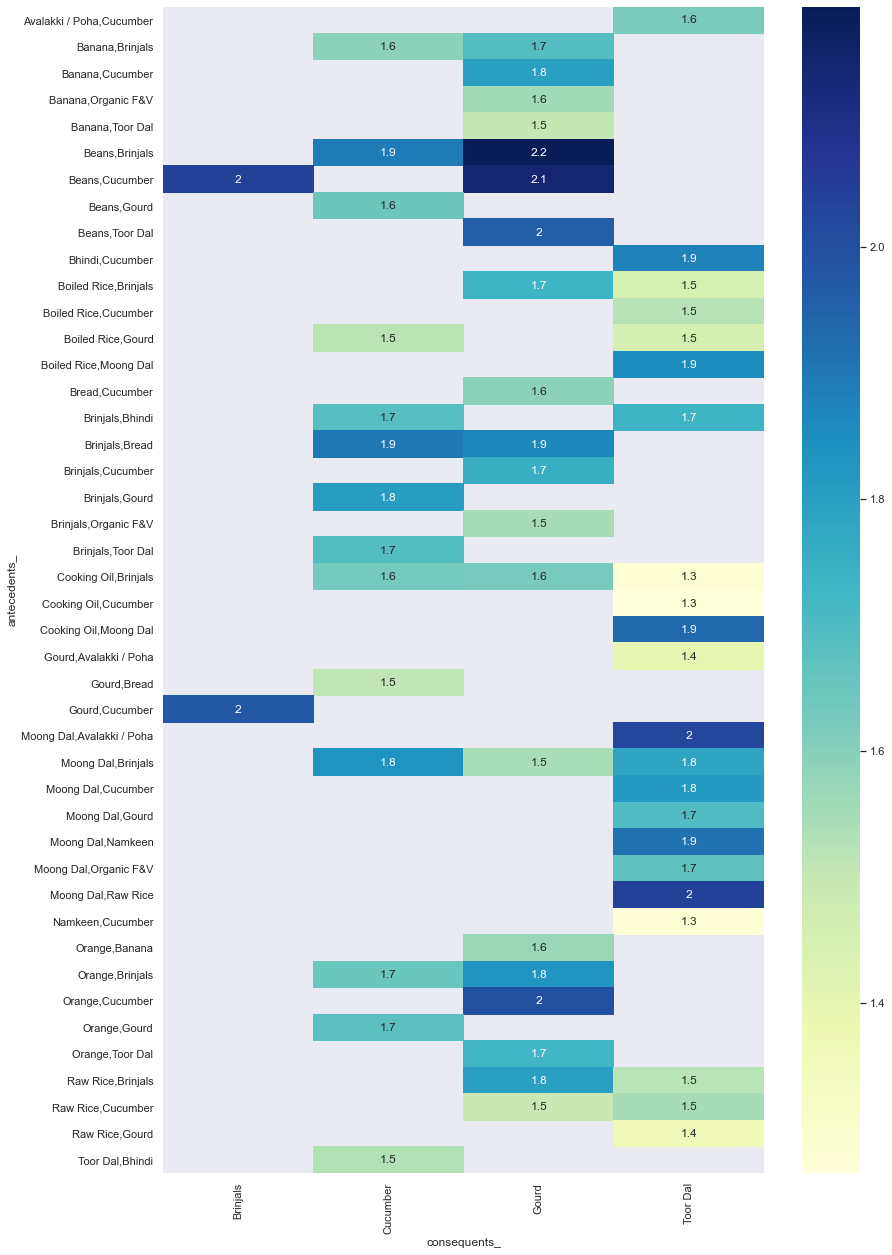

In [110]:
# Heatmap showing the the items lift 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (12, 20)})

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))


# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['items number'] == 2].pivot(index='antecedents_',
                                               columns='consequents_', values='lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [111]:
cols = ['antecedents','consequents']
rules[cols] = rules[cols].applymap(lambda x: tuple(x))
association_results = (rules.explode('antecedents')
                            .reset_index(drop=True)
                            .explode('consequents')
                            .reset_index(drop=True))
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,items number,description,antecedents_,consequents_
0,Beans,Gourd,0.116959,0.337749,0.074233,0.634694,1.879187,0.034730,1.812865,1,frozenset({'Beans'})=>frozenset({'Gourd'}),Beans,Gourd
1,Avalakki / Poha,Toor Dal,0.077098,0.397541,0.045351,0.588235,1.479683,0.014702,1.463114,1,frozenset({'Avalakki / Poha'})=>frozenset({'To...,Avalakki / Poha,Toor Dal
2,Almonds,Toor Dal,0.062060,0.397541,0.032581,0.525000,1.320617,0.007910,1.268334,1,frozenset({'Almonds'})=>frozenset({'Toor Dal'}),Almonds,Toor Dal
3,Bhindi,Toor Dal,0.088435,0.397541,0.062895,0.711201,1.788998,0.027739,2.086083,1,frozenset({'Bhindi'})=>frozenset({'Toor Dal'}),Bhindi,Toor Dal
4,Brinjals,Cucumber,0.259697,0.331066,0.140948,0.542739,1.639369,0.054971,1.462915,1,frozenset({'Brinjals'})=>frozenset({'Cucumber'}),Brinjals,Cucumber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Brinjals,Gourd,0.029717,0.337749,0.015157,0.510040,1.510115,0.005120,1.351643,3,"frozenset({'Moong Dal', 'Brinjals', 'Toor Dal'...","Moong Dal,Brinjals,Toor Dal",Gourd
182,Toor Dal,Gourd,0.029717,0.337749,0.015157,0.510040,1.510115,0.005120,1.351643,3,"frozenset({'Moong Dal', 'Brinjals', 'Toor Dal'...","Moong Dal,Brinjals,Toor Dal",Gourd
183,Moong Dal,Toor Dal,0.025301,0.397541,0.017305,0.683962,1.720480,0.007247,1.906287,3,"frozenset({'Moong Dal', 'Gourd', 'Cucumber'})=...","Moong Dal,Gourd,Cucumber",Toor Dal
184,Gourd,Toor Dal,0.025301,0.397541,0.017305,0.683962,1.720480,0.007247,1.906287,3,"frozenset({'Moong Dal', 'Gourd', 'Cucumber'})=...","Moong Dal,Gourd,Cucumber",Toor Dal


In [115]:
rules[rules['items number'] == 2].sort_values('lift', ascending=False).iloc[3]['description']

"frozenset({'Moong Dal', 'Raw Rice'})=>frozenset({'Toor Dal'})"

In [116]:
rules_sorted['description'].iloc[4], rules_sorted['description'].iloc[3]

("frozenset({'Moong Dal', 'Avalakki / Poha'})=>frozenset({'Toor Dal'})",
 "frozenset({'Moong Dal', 'Raw Rice'})=>frozenset({'Toor Dal'})")

In [117]:
rules[rules['items number'] == 2].sort_values('lift', ascending=False).iloc[3]['description']

"frozenset({'Moong Dal', 'Raw Rice'})=>frozenset({'Toor Dal'})"

In [118]:
# We can also identify recomemndations in baskets with more than 1 items purchased
association_results['items number'] = association_results['antecedents'].apply(lambda x: len(x))
rules['description'] = association_results['antecedents'].astype(
    "unicode") + "=>" + association_results['consequents'].astype("unicode")
rules_sorted = association_results[association_results['items number'] >= 3].sort_values('lift', ascending=False).head()
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,items number,description,antecedents_,consequents_
140,Cucumber,Gourd,0.029598,0.337749,0.023153,0.782258,2.316092,0.013156,3.041448,8,"frozenset({'Beans', 'Brinjals', 'Cucumber'})=>...","Beans,Brinjals,Cucumber",Gourd
139,Brinjals,Gourd,0.029598,0.337749,0.023153,0.782258,2.316092,0.013156,3.041448,8,"frozenset({'Beans', 'Brinjals', 'Cucumber'})=>...","Beans,Brinjals,Cucumber",Gourd
138,Beans,Gourd,0.029598,0.337749,0.023153,0.782258,2.316092,0.013156,3.041448,5,"frozenset({'Beans', 'Brinjals', 'Cucumber'})=>...","Beans,Brinjals,Cucumber",Gourd
135,Beans,Brinjals,0.040458,0.259697,0.023153,0.572271,2.203613,0.012646,1.730778,5,"frozenset({'Beans', 'Gourd', 'Cucumber'})=>fro...","Beans,Gourd,Cucumber",Brinjals
137,Cucumber,Brinjals,0.040458,0.259697,0.023153,0.572271,2.203613,0.012646,1.730778,8,"frozenset({'Beans', 'Gourd', 'Cucumber'})=>fro...","Beans,Gourd,Cucumber",Brinjals


In [119]:
rules.sort_values('lift', ascending=False)[:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,items number,description,antecedents_,consequents_
76,"(Beans, Brinjals, Cucumber)","(Gourd,)",0.029598,0.337749,0.023153,0.782258,2.316092,0.013156,3.041448,3,Orange=>Gourd,"Beans,Brinjals,Cucumber",Gourd
75,"(Beans, Gourd, Cucumber)","(Brinjals,)",0.040458,0.259697,0.023153,0.572271,2.203613,0.012646,1.730778,3,Cucumber=>Gourd,"Beans,Gourd,Cucumber",Brinjals
18,"(Beans, Brinjals)","(Gourd,)",0.047261,0.337749,0.034968,0.739899,2.190676,0.019006,2.546130,2,Beans=>Brinjals,"Beans,Brinjals",Gourd
78,"(Cooking Oil, Gourd, Cucumber)","(Brinjals,)",0.030911,0.259697,0.017186,0.555985,2.140898,0.009158,1.667291,3,Moong Dal=>Toor Dal,"Cooking Oil,Gourd,Cucumber",Brinjals
20,"(Beans, Cucumber)","(Gourd,)",0.055973,0.337749,0.040458,0.722814,2.140093,0.021553,2.389197,2,Beans=>Gourd,"Beans,Cucumber",Gourd
83,"(Orange, Brinjals, Cucumber)","(Gourd,)",0.021840,0.337749,0.015396,0.704918,2.087105,0.008019,2.244295,3,Brinjals=>Toor Dal,"Orange,Brinjals,Cucumber",Gourd
87,"(Gourd, Toor Dal, Cucumber)","(Brinjals,)",0.062060,0.259697,0.033178,0.534615,2.058613,0.017061,1.590734,3,Brinjals=>Gourd,"Gourd,Toor Dal,Cucumber",Brinjals
17,"(Beans, Cucumber)","(Brinjals,)",0.055973,0.259697,0.029598,0.528785,2.036161,0.015062,1.571051,2,Brinjals=>Cucumber,"Beans,Cucumber",Brinjals
70,"(Moong Dal, Raw Rice)","(Toor Dal,)",0.031269,0.397541,0.025301,0.809160,2.035411,0.012871,3.156883,2,Brinjals=>Cucumber,"Moong Dal,Raw Rice",Toor Dal
29,"(Moong Dal, Avalakki / Poha)","(Toor Dal,)",0.020169,0.397541,0.016231,0.804734,2.024276,0.008213,3.085318,2,Brinjals=>Cucumber,"Moong Dal,Avalakki / Poha",Toor Dal


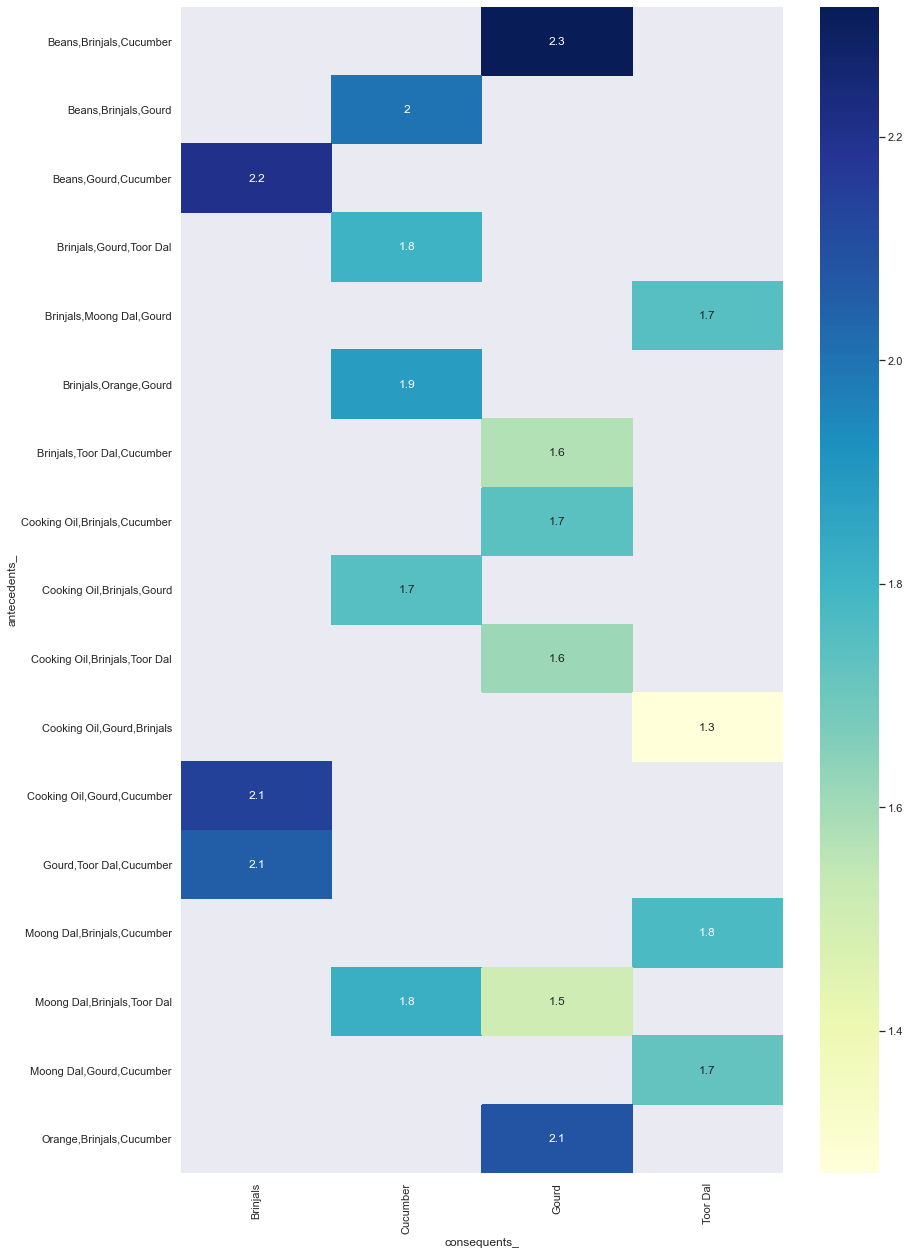

In [120]:
# Heatmap showing the the items lift 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (12, 20)})

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))


# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['items number'] ==3 ].pivot(index='antecedents_',
                                               columns='consequents_', values='lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [121]:
association_results.to_csv('association_mymba1.csv',index=False)

In [122]:
def recommend_products(product):
  products_to_recommend = association_results[association_results['antecedents'] == product]
  products_to_recommend = pd.DataFrame(products_to_recommend.consequents).reset_index(drop = True)
  products_to_recommend.columns = ['Recommended Products']
  return products_to_recommend
  
#recommend_products('Banana')

user_selected_item = input("Enter a product to be added to the cart from the above list of products : ")
print('\n\n Product Recommendations based on your selected item\n\n')
recommend_products(user_selected_item)[:3]

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.8)
sns.set(rc={'figure.figsize': (6, 6)})
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
sns.set(rc={'figure.figsize': (6, 6)})
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'],1.8)
sns.set(rc={'figure.figsize': (6, 6)})
plt.xlabel('lift')
plt.ylabel('confidence')
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))

In [ ]:
scatter = sns.scatterplot(x="support", y="confidence",
                            hue="lift", # color dots by lift value
                            palette="viridis",
                          # set colors
                            data=rules) # data to use

In [ ]:
rules[rules['items number'] == 1].sort_values('lift', ascending=False).iloc[6]['description']

In [ ]:
# We can also identify recomemndations in baskets with more than 1 items purchased
association_results['items number'] = association_results['antecedents'].apply(lambda x: len(x))
rules['description'] = association_results['antecedents'].astype(
    "unicode") + "=>" + association_results['consequents'].astype("unicode")
rules_sorted = association_results[association_results['items number'] >= 2].sort_values('lift', ascending=False).head()
rules_sorted